# 前置作業

[Dcard API](https://blog.jiatool.com/posts/dcard_api_v2/)

[NRC實作](https://zhuanlan.zhihu.com/p/101354375)

[NRC官網](https://www.saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm)

[NRC-Persian-Lexicon-GIT](https://github.com/mhbashari/NRC-Persian-Lexicon)

In [22]:
import pandas as pd
import time, jieba
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lexion_df = pd.read_excel('NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx')
lexion_df.head()

,English Word,Arabic Translation (Google Translate),Basque Translation (Google Translate),Bengali Translation (Google Translate),Catalan Translation (Google Translate),Chinese (simplified) Translation (Google Translate),Chinese (traditional) Translation (Google Translate),Danish Translation (Google Translate),Dutch Translation (Google Translate),Esperanto Translation (Google Translate),...,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,الى الوراء,aback,পশ্চাতে,darrere,吓了一跳,嚇了一跳,overrasket,verrast,surprizita,...,0,0,0,0,0,0,0,0,0,0
1,abacus,طبلية تاج,abako,গণনা-যন্ত্রবিশেষ,àbac,算盘,算盤,abacus,abacus,abako,...,0,0,0,0,0,0,0,0,0,1
2,abandon,تخلى,alde batera utzi,বর্জিত করা,abandonar,放弃,放棄,opgive,verlaten,forlasos,...,0,1,0,0,0,1,0,1,0,0
3,abandoned,مهجور,abandonatu,পরিত্যক্ত,abandonat,弃,棄,forladte,verlaten,forlasita,...,0,1,1,0,0,1,0,1,0,0
4,abandonment,هجر,abandono,বিসর্জন,abandonament,放弃,放棄,opgivelse,verlatenheid,forlasas,...,0,1,1,0,0,1,0,1,1,0


In [3]:
print(lexion_df.columns)

Index(['English Word', 'Arabic Translation (Google Translate)',
       'Basque Translation (Google Translate)',
       'Bengali Translation (Google Translate)',
       'Catalan Translation (Google Translate)',
       'Chinese (simplified) Translation (Google Translate)',
       'Chinese (traditional) Translation (Google Translate)',
       'Danish Translation (Google Translate)',
       'Dutch Translation (Google Translate)',
       'Esperanto Translation (Google Translate)',
       'Finnish Translation (Google Translate)',
       'French Translation (Google Translate)',
       'German Translation (Google Translate)',
       'Greek Translation (Google Translate)',
       'Gujarati Translation (Google Translate)',
       'Hebrew Translation (Google Translate)',
       'Hindi Translation (Google Translate)',
       'Irish Translation (Google Translate)',
       'Italian Translation (Google Translate)',
       'Japanese Translation (Google Translate)',
       'Latin Translation (Google Tr

In [4]:
#指定是用繁體的字典
chinese_df = lexion_df[['Chinese (traditional) Translation (Google Translate)', 'Positive', 'Negative', 
                 'Anger','Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']]
chinese_df.head()

,Chinese (traditional) Translation (Google Translate),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,嚇了一跳,0,0,0,0,0,0,0,0,0,0
1,算盤,0,0,0,0,0,0,0,0,0,1
2,放棄,0,1,0,0,0,1,0,1,0,0
3,棄,0,1,1,0,0,1,0,1,0,0
4,放棄,0,1,1,0,0,1,0,1,1,0


In [5]:
Positive = []
Negative = []
Anger = []
Anticipation = []
Disgust = []
Fear = []
Joy = []
Sadness = []
Surprise = []
Trust = []
for idx, row in chinese_df.iterrows():
    if row['Positive']==1:
        Positive.append(row['Chinese (traditional) Translation (Google Translate)'])
    if row['Negative']==1:
        Negative.append(row['Chinese (traditional) Translation (Google Translate)'])
    if row['Anger']==1:
        Anger.append(row['Chinese (traditional) Translation (Google Translate)'])
    if row['Anticipation']==1:
        Anticipation.append(row['Chinese (traditional) Translation (Google Translate)'])
    if row['Disgust']==1:
        Disgust.append(row['Chinese (traditional) Translation (Google Translate)'])
    if row['Fear']==1:
        Fear.append(row['Chinese (traditional) Translation (Google Translate)'])
    if row['Joy']==1:
        Joy.append(row['Chinese (traditional) Translation (Google Translate)'])
    if row['Sadness']==1:
        Sadness.append(row['Chinese (traditional) Translation (Google Translate)'])
    if row['Surprise']==1:
        Surprise.append(row['Chinese (traditional) Translation (Google Translate)'])
    if row['Trust']==1:
        Trust.append(row['Chinese (traditional) Translation (Google Translate)'])
        
print('词语列表构建完成')

词语列表构建完成


In [6]:
def emotion_caculate(text):
    positive = 0
    negative = 0
    anger = 0
    anticipation = 0
    disgust = 0
    fear = 0
    joy = 0
    sadness = 0
    surprise = 0
    trust = 0
    
    wordlist = jieba.lcut(text)
    wordset = set(wordlist)
    wordfreq = []
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive:
            positive+=freq
        if word in Negative:
            negative+=freq
        if word in Anger:
            anger+=freq  
        if word in Anticipation:
            anticipation+=freq
        if word in Disgust:
            disgust+=freq
        if word in Fear:
            fear+=freq
        if word in Joy:
            joy+=freq
        if word in Sadness:
            sadness+=freq
        if word in Surprise:
            surprise+=freq
        if word in Trust:
            trust+=freq
            
    emotion_info = {
        'positive': positive,
        'negative': negative,
        'anger': anger,
        'anticipation': anticipation,
        'disgust': disgust,
        'fear':fear,
        'joy':joy,
        'sadness':sadness,
        'surprise':surprise,
        'trust':trust,
        'length':len(wordlist)
    }
    indexs = ['length', 'positive', 'negative', 'anger', 'anticipation','disgust','fear','joy','sadness','surprise','trust']
    return pd.Series(emotion_info, index=indexs)

In [ ]:
emotions = emotion_caculate(text='这个国家再对这些制造假冒伪劣食品药品的人手软的话，那后果真的会相当糟糕。坐牢？从快判个死刑')
emotions = emotion_caculate(text='唯有得到之後，你才會深刻體會：得不到的才是最好的。')
print(emotions)

# 長榮台灣留言

In [89]:
start = time.time()

with open('長榮台灣留言to繁體.txt', 'r') as f:
    texts = f.read()
    emotions = emotion_caculate(texts)
    print(emotions)

end = time.time()
print(f'used time: {end - start}')

length          11911
positive          513
negative          757
anger             431
anticipation      268
disgust           361
fear              569
joy               135
sadness           541
surprise          219
trust             380
dtype: int64
used time: 1.3283531665802002


In [90]:
all_emotion = emotions['positive'] + emotions['negative'] + \
              emotions['anger'] + emotions['anticipation'] + \
              emotions['disgust'] + emotions['fear'] + \
              emotions['joy'] + emotions['sadness'] + \
              emotions['surprise'] + emotions['trust']
print(all_emotion)

4174


In [91]:
pos = (emotions['positive']/all_emotion)*100
neg = (emotions['negative']/all_emotion)*100
ang = (emotions['anger']/all_emotion)*100
dis = (emotions['disgust']/all_emotion)*100
ant = (emotions['anticipation']/all_emotion)*100
fear = (emotions['fear']/all_emotion)*100
sad = (emotions['sadness']/all_emotion)*100
joy = (emotions['joy']/all_emotion)*100
surp = (emotions['surprise']/all_emotion)*100
trust = (emotions['trust']/all_emotion)*100

pos,neg,ang,dis,ant,fear,sad,joy,surp,trust

(12.290368950646862,
 18.13608049832295,
 10.325826545280306,
 8.648778150455199,
 6.420699568758984,
 13.632007666506949,
 12.961188308576904,
 3.234307618591279,
 5.246765692381409,
 9.103977000479157)

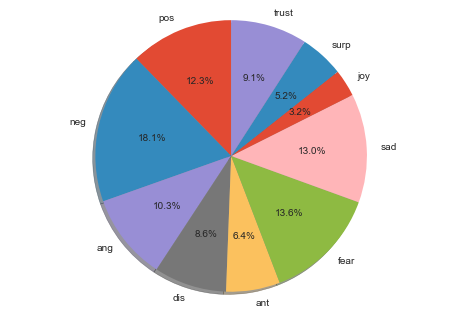

In [92]:
plt.style.use('ggplot')

labels = ['pos','neg','ang','dis','ant','fear','sad','joy','surp','trust']
scores = [pos,neg,ang,dis,ant,fear,sad,joy,surp,trust]

fig1, ax1 = plt.subplots()
ax1.pie(scores, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.show()

plt.savefig('長榮案件之台灣媒體留言情緒分析_separate.png')

In [93]:
pos+neg+ang+dis+ant+fear+sad+joy+surp+trust

100.00000000000001

In [94]:
neg_score = neg + ang + dis + fear + sad
pos_score = pos + ant + joy + trust
print(f'neg_score: {neg_score}')
print(f'pos_score: {pos_score}')

neg_score: 63.703881169142306
pos_score: 31.049353138476278


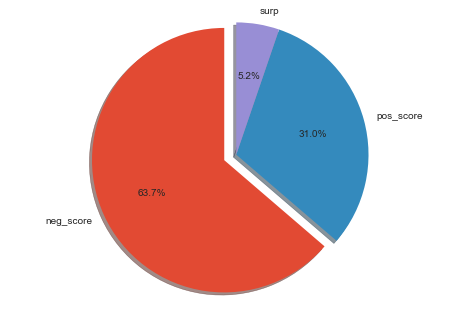

In [95]:
plt.style.use('ggplot')

labels = ['neg_score', 'pos_score', 'surp']
scores = [neg_score, pos_score, surp]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(scores, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.show()

plt.savefig('長榮案件之台灣媒體留言情緒分析_total.png')

# 長榮大馬留言

In [96]:
start = time.time()

with open('長榮大馬留言to繁體.txt', 'r') as f:
    texts = f.read()
    emotions = emotion_caculate(texts)
    print(emotions)

end = time.time()
print(f'used time: {end - start}')

length          45404
positive         1787
negative         1783
anger             971
anticipation      919
disgust           761
fear             1254
joy               557
sadness          1083
surprise          473
trust            1223
dtype: int64
used time: 7.892518997192383


In [97]:
all_emotion = emotions['positive'] + emotions['negative'] + \
              emotions['anger'] + emotions['anticipation'] + \
              emotions['disgust'] + emotions['fear'] + \
              emotions['joy'] + emotions['sadness'] + \
              emotions['surprise'] + emotions['trust']
print(all_emotion)

10811


In [98]:
pos = (emotions['positive']/all_emotion)*100
neg = (emotions['negative']/all_emotion)*100
ang = (emotions['anger']/all_emotion)*100
dis = (emotions['disgust']/all_emotion)*100
ant = (emotions['anticipation']/all_emotion)*100
fear = (emotions['fear']/all_emotion)*100
sad = (emotions['sadness']/all_emotion)*100
joy = (emotions['joy']/all_emotion)*100
surp = (emotions['surprise']/all_emotion)*100
trust = (emotions['trust']/all_emotion)*100

pos,neg,ang,dis,ant,fear,sad,joy,surp,trust

(16.529460734437148,
 16.492461381925814,
 8.981592822125613,
 7.039126815280733,
 8.500601239478309,
 11.599297012302284,
 10.017574692442881,
 5.1521598372028485,
 4.375173434464897,
 11.31255203033947)

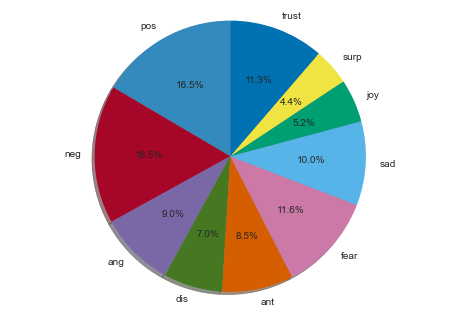

In [99]:
plt.style.use('bmh')

labels = ['pos','neg','ang','dis','ant','fear','sad','joy','surp','trust']
scores = [pos,neg,ang,dis,ant,fear,sad,joy,surp,trust]

fig1, ax1 = plt.subplots()
ax1.pie(scores, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

plt.savefig('長榮案件之大馬媒體留言情緒分析_separate.png')

In [100]:
pos+neg+ang+dis+ant+fear+sad+joy+surp+trust

99.99999999999999

In [101]:
neg_score = neg + ang + dis + fear + sad
pos_score = pos + ant + joy + trust
print(f'neg_score: {neg_score}')
print(f'pos_score: {pos_score}')

neg_score: 54.130052724077316
pos_score: 41.49477384145778


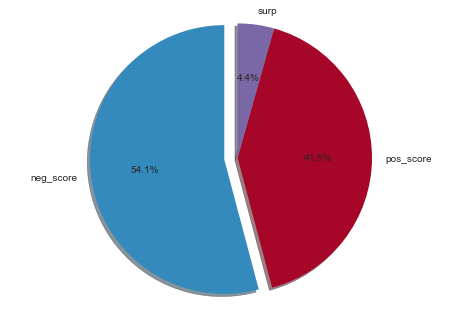

In [102]:
plt.style.use('bmh')

labels = ['neg_score', 'pos_score', 'surp']
scores = [neg_score, pos_score, surp]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(scores, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.show()

plt.savefig('長榮案件之大馬媒體留言情緒分析_total.png')